In [71]:
import os, sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_VISIBLE_DEVICES=0


In [72]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm, trange
from pandas import DataFrame
moving_average = lambda x, **kw: DataFrame({'x':np.asarray(x)}).x.ewm(**kw).mean().values

In [73]:
import torch
import numpy as np
import random
from utils_mcts import ReplayBuffer, PathsBuffer, get_states_emb, convert_to_walk
from MCTS import MCTS
from problem_mcts import GraphProblem, generate_erdos_renyi_problems, generate_regular_problems
from network_mcts import Agent

In [74]:
#params
NUM_ITERS = 100
NUM_EPISODES = 100
PATH_LENGTH = 10
BATCH_SIZE = 32
NUM_MCSIMS = 10
NUM_UPDATES = 3
TEMP_THRESHOLD = 10
NUM_VERTICES = 10
CPUCT = 1
THRESHOLD = 0.75

In [75]:
#initialize problem
problem_maker = generate_regular_problems(num_vertices=10, degree=3)


In [76]:
problem = next(problem_maker)

In [77]:
#initialize agent
agent = Agent(hid_size=256, gcn_size=256, vertex_emb_size=64, num_vertices=NUM_VERTICES)

In [78]:
#initialize graph_emb
graph_emb = agent.embed_graph(problem.edges)

In [79]:
#initialize buffers
path_buffer = PathsBuffer(threshold=THRESHOLD)
train_buffer = ReplayBuffer()

In [80]:
optimizer = torch.optim.Adam(agent.parameters(), lr=1e-4)

In [81]:
moving_average = lambda x, **kw: DataFrame({'x':np.asarray(x)}).x.ewm(**kw).mean().values

In [82]:
pi_losses_history = []
v_losses_history = []

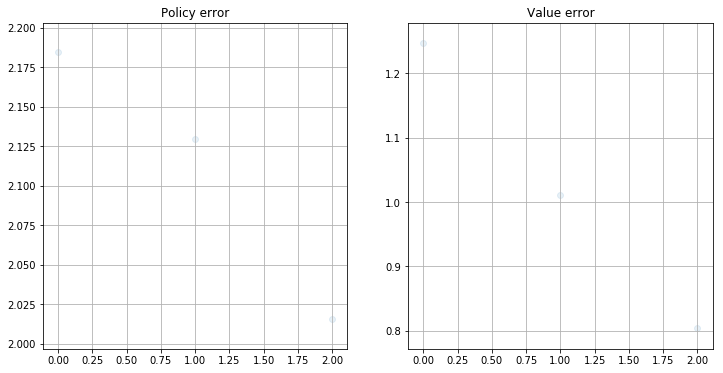




  1%|          | 1/100 [00:18<30:44, 18.64s/it]

[0.         0.         0.         0.33902903 0.         0.
 0.33651567 0.32445531 0.         0.        ]
3
[0.33539198 0.34449105 0.32011697 0.         0.         0.
 0.         0.         0.         0.        ]
3
1
[0.         0.         0.         0.31626879 0.34362467 0.
 0.         0.         0.34010654 0.        ]
3
1
4
[0.         0.29517491 0.27122281 0.         0.         0.
 0.         0.         0.         0.43360228]
3
1
4
9
[0.         0.         0.         0.         0.35303013 0.33561538
 0.         0.31135449 0.         0.        ]
3
1
4
9
4
[0.         0.29511715 0.27017265 0.         0.         0.
 0.         0.         0.         0.43471021]
3
1
4
1
[0.         0.         0.         0.3154362  0.34345943 0.
 0.         0.         0.34110437 0.        ]
3
1
4
1
4
[0.         0.29506903 0.2714158  0.         0.         0.
 0.         0.         0.         0.43351517]
3
1
4
1
4
9
[0.         0.         0.         0.         0.35322277 0.33685103
 0.         0.3099262  0.

[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         0.
 0.         0.         0.         0.43745919]
4
9
[0.         0.    

[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         

[0.         0.         0.         0.         0.35102601 0.32657474
 0.         0.32239925 0.         0.        ]
4
[0.         0.29736113 0.26596433 0.         0.         0.
 0.         0.         0.         0.43667453]
4
9
[0.         0.         0.         0.         0.35191296 0.32930224
 0.         0.3187848  0.         0.        ]
4
9
4
[0.         0.29669999 0.26656927 0.         0.         0.
 0.         0.         0.         0.43673075]
4
1
[0.         0.         0.         0.31817279 0.33890346 0.
 0.         0.         0.34292375 0.        ]
4
1
8
[0.         0.34896559 0.         0.         0.         0.32177672
 0.3292577  0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31760278 0.33936211 0.
 0.         0.         0.34303511 0.        ]
4
1
8
1
8
[0.         0.34837082 0.         0.         0.         0.32264332
 0.32898587 0.         0.         0.        ]
4
1
8
1
8
1
4
1
8
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0

4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35102601 0.32657474
 0.         0.32239925 0.         0.        ]
4
[0.         0.29736113 0.26596433 0.         0.         0.
 0.         0.         0.         0.43667453]
4
9
[0.         0.         0.         0.         0.35191296 0.32930224
 0.         0.3187848  0.         0.        ]
4
9
4
[0.         0.29669999 0.26656927 0.         0.         0.
 0.         0.         0.         0.43673075]
4
1
[0.         0.         0.         0.31817279 0.33890346 0.
 0.         0.         0.34292375 0.        ]
4
1
8
[0.         0.34896559 0.         0.         0.         0.32177672
 0.3292577  0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31760278 0.33936211 0.
 0.         0.         0.34303511 0.        ]
4
1
8
1
8
[0.         0.34837082 0.         0.         0.         0.32264332
 0.32898587 0.         0.         0.        ]
4
1
8
1
8
1
4
1
8
1
8
1
[0.0, 0.0, 0.

[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         0.
 0.         0.   

[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         0.
 0.         0.         0.         0.43745919]
4
9
[0.         0.         0.         0.         0.35157289 0.32802775
 0.         0.32039936 0.         0.        ]
4
9
4
4
1
[0.         0.         0.         0.31900568 0.33727775 0.
 0.         0.         0.34371657 0.        ]
4
1
8
4
1
8
4


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.  

[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         0.3208501
 0.32911577 0.         0.         0.        ]
6
8
1
8
1
8
1
8
1
[0.         0.         0.         0.31799903 0.33802946 0.
 0.         0.         0.34397151 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33902903 0.         0.
 0.33651567 0.32445531 0.         0.        ]
3
[0.33539198 0.34449105 0.32011697 0.         0.         0.
 0.         0.         0.         0.        ]
3
1
[0.         0.         0

[0.         0.34680991 0.         0.         0.         0.32462695
 0.32856313 0.         0.         0.        ]
4
1
8
1
8
1
[0.         0.         0.         0.31640495 0.34105124 0.
 0.         0.         0.34254381 0.        ]
4
1
8
1
8
1
8
[0.         0.34669321 0.         0.         0.         0.32486267
 0.32844412 0.         0.         0.        ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35106054 0.32694646
 0.         0.321993   0.         0.        ]
4
[0.         0.29707179 0.26677493 0.         0.         0.
 0.         0.         0.         0.43615328]
4
9
[0.         0.         0.         0.         0.35211507 0.33006773
 0.         0.31781721 0.         0.        ]
4
9
4
[0.         0.2963879  0.26721537 0.         0.         0.
 0.         0.         0.         0.43639673]
4
1
[0.         0.         0.         0.31767105 0.33988187 0.
 0.         0.         0.34244708 0.        ]
4
1
8
[0.         0.34815686 0.    

[0.         0.         0.         0.         0.35100181 0.32635368
 0.         0.32264451 0.         0.        ]
4
[0.         0.29754876 0.26542834 0.         0.         0.
 0.         0.         0.         0.4370229 ]
4
9
[0.         0.         0.         0.         0.35176777 0.3287558
 0.         0.31947643 0.         0.        ]
4
9
4
[0.         0.29692966 0.26608779 0.         0.         0.
 0.         0.         0.         0.43698256]
4
1
[0.         0.         0.         0.31853029 0.3382059  0.
 0.         0.         0.3432638  0.        ]
4
1
8
[0.         0.34957069 0.         0.         0.         0.32102182
 0.32940749 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31794425 0.33876724 0.
 0.         0.         0.34328851 0.        ]
4
1
8
1
8
4
1
8
1
8
4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29

4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0

[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         0.3208501
 0.32911577 0.         0.         0.        ]
6
8
1
8
1
8
1
8
1
[0.         0.         0.         0.31799903 0.33802946 0.
 0.         0.         0.34397151 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33902903 0.         0.
 0.33651567 0.32445531 0.         0.        ]
3
[0.33539198 0.34449105 0.32011697 0.         0.         0.
 0.         0.         0.         0.        ]
3
1
[0.         0.         0.         0.31626879 0.34362467 0.
 0.         0.         0.34010654 0.        ]
3
1
4
[0.         0.29517491 0.27122281 0.

[0.         0.29511715 0.27017265 0.         0.         0.
 0.         0.         0.         0.43471021]
3
1
4
1
[0.         0.         0.         0.3154362  0.34345943 0.
 0.         0.         0.34110437 0.        ]
3
1
4
1
4
[0.         0.29506903 0.2714158  0.         0.         0.
 0.         0.         0.         0.43351517]
3
1
4
1
4
9
[0.         0.         0.         0.         0.35322277 0.33685103
 0.         0.3099262  0.         0.        ]
3
1
4
1
4
9
4
[0.         0.29505435 0.27057634 0.         0.         0.
 0.         0.         0.         0.43436931]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35110854 0.32770202
 0.         0.32118944 0.         0.        ]
4
[0.         0.29656966 0.2681423  0.         0.         0.
 0.         0.         0.         0.43528804]
4
9
[0.         0.         0.         0.         0.35241565 0.33121693
 0.         0.31636742 0.         0.        ]
4
9
4
[0.         0.2959395  0.2681

[0.         0.29669999 0.26656927 0.         0.         0.
 0.         0.         0.         0.43673075]
4
1
[0.         0.         0.         0.31817279 0.33890346 0.
 0.         0.         0.34292375 0.        ]
4
1
8
[0.         0.34896559 0.         0.         0.         0.32177672
 0.3292577  0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31760278 0.33936211 0.
 0.         0.         0.34303511 0.        ]
4
1
8
1
8
[0.         0.34837082 0.         0.         0.         0.32264332
 0.32898587 0.         0.         0.        ]
4
1
8
1
8
1
4
1
8
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35100181 0.32635368
 0.         0.32264451 0.         0.        ]
4
[0.         0.29754876 0.26542834 0.         0.         0.
 0.         0.         0.         0.4370229 ]
4
9
[0.         0.         0.         0.         0.35176777 0.3287558
 0.         0.31947643 0.         0.        ]
4
9
4
[0.         0.

4
1
[0.         0.         0.         0.31900568 0.33727775 0.
 0.         0.         0.34371657 0.        ]
4
1
8
4
1
8
4
1
8
4
1
8
4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         

[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         

[0.         0.29511715 0.27017265 0.         0.         0.
 0.         0.         0.         0.43471021]
3
1
4
1
[0.         0.         0.         0.3154362  0.34345943 0.
 0.         0.         0.34110437 0.        ]
3
1
4
1
4
[0.         0.29506903 0.2714158  0.         0.         0.
 0.         0.         0.         0.43351517]
3
1
4
1
4
9
[0.         0.         0.         0.         0.35322277 0.33685103
 0.         0.3099262  0.         0.        ]
3
1
4
1
4
9
4
[0.         0.29505435 0.27057634 0.         0.         0.
 0.         0.         0.         0.43436931]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35110854 0.32770202
 0.         0.32118944 0.         0.        ]
4
[0.         0.29656966 0.2681423  0.         0.         0.
 0.         0.         0.         0.43528804]
4
9
[0.         0.         0.         0.         0.35241565 0.33121693
 0.         0.31636742 0.         0.        ]
4
9
4
[0.         0.2959395  0.2681

[0.         0.29692966 0.26608779 0.         0.         0.
 0.         0.         0.         0.43698256]
4
1
[0.         0.         0.         0.31853029 0.3382059  0.
 0.         0.         0.3432638  0.        ]
4
1
8
[0.         0.34957069 0.         0.         0.         0.32102182
 0.32940749 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31794425 0.33876724 0.
 0.         0.         0.34328851 0.        ]
4
1
8
1
8
4
1
8
1
8
4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.       

4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         0.
 0.    

4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1

[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         0.3208501
 0.32911577 0.         0.         0.        ]
6
8
1
8
1
8
1
8
1
[0.         0.         0.        

[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         0.3208501
 0.32911577 0.         0.         0.        ]
6
8
1
8
1
8
1
8
1
[0.         0.         0.         0.31799903 0.33802946 0.
 0.         0.         0.34397151 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33902903 0.         0.
 0.33651567 0.32445531 0.         0.        ]
3
[0.33539198 0.34449105 0.32011697 0.         0.         0.
 0.         0.         0.         0.        ]
3
1
[0.         0.         0.         0.31626879 0.34362467 0.
 0.         0.         0.34010654 0.        ]
3
1
4
[0.         0.29517491 0.27122281 0.         0.         0.
 0.         0.         0.         0.43360228]
3
1
4
9
[0.         0.         0.         0.         0.35303013 0.33561538
 0.         0.31135449 0.         0.        ]
3
1
4
9
4
[0.         0.29511715 0.27017265 0.        

[0.         0.         0.         0.31691432 0.34135214 0.
 0.         0.         0.34173355 0.        ]
4
1
8
[0.         0.34701982 0.         0.         0.         0.32420295
 0.32877723 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31657483 0.34115195 0.
 0.         0.         0.34227321 0.        ]
4
1
8
1
8
[0.         0.34680991 0.         0.         0.         0.32462695
 0.32856313 0.         0.         0.        ]
4
1
8
1
8
1
[0.         0.         0.         0.31640495 0.34105124 0.
 0.         0.         0.34254381 0.        ]
4
1
8
1
8
1
8
[0.         0.34669321 0.         0.         0.         0.32486267
 0.32844412 0.         0.         0.        ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35106054 0.32694646
 0.         0.321993   0.         0.        ]
4
[0.         0.29707179 0.26677493 0.         0.         0.
 0.         0.         0.         0.43615328]
4
9
[0.         0.       

[0.         0.         0.         0.         0.35191296 0.32930224
 0.         0.3187848  0.         0.        ]
4
9
4
[0.         0.29669999 0.26656927 0.         0.         0.
 0.         0.         0.         0.43673075]
4
1
[0.         0.         0.         0.31817279 0.33890346 0.
 0.         0.         0.34292375 0.        ]
4
1
8
[0.         0.34896559 0.         0.         0.         0.32177672
 0.3292577  0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31760278 0.33936211 0.
 0.         0.         0.34303511 0.        ]
4
1
8
1
8
[0.         0.34837082 0.         0.         0.         0.32264332
 0.32898587 0.         0.         0.        ]
4
1
8
1
8
1
4
1
8
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35100181 0.32635368
 0.         0.32264451 0.         0.        ]
4
[0.         0.29754876 0.26542834 0.         0.         0.
 0.         0.         0.         0.4370229 ]
4
9
[0.         0

[0.         0.34957069 0.         0.         0.         0.32102182
 0.32940749 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31794425 0.33876724 0.
 0.         0.         0.34328851 0.        ]
4
1
8
1
8
4
1
8
1
8
4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4


4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.

[0.         0.         0.         0.         0.35157289 0.32802775
 0.         0.32039936 0.         0.        ]
4
9
4
4
1
[0.         0.         0.         0.31900568 0.33727775 0.
 0.         0.         0.34371657 0.        ]
4
1
8
4
1
8
4
1
8
4
1
8
4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.3466883

[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         

[0.         0.         0.         0.         0.35241565 0.33121693
 0.         0.31636742 0.         0.        ]
4
9
4
[0.         0.2959395  0.26812788 0.         0.         0.
 0.         0.         0.         0.43593262]
4
1
[0.         0.         0.         0.31691432 0.34135214 0.
 0.         0.         0.34173355 0.        ]
4
1
8
[0.         0.34701982 0.         0.         0.         0.32420295
 0.32877723 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31657483 0.34115195 0.
 0.         0.         0.34227321 0.        ]
4
1
8
1
8
[0.         0.34680991 0.         0.         0.         0.32462695
 0.32856313 0.         0.         0.        ]
4
1
8
1
8
1
[0.         0.         0.         0.31640495 0.34105124 0.
 0.         0.         0.34254381 0.        ]
4
1
8
1
8
1
8
[0.         0.34669321 0.         0.         0.         0.32486267
 0.32844412 0.         0.         0.        ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.   

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35102601 0.32657474
 0.         0.32239925 0.         0.        ]
4
[0.         0.29736113 0.26596433 0.         0.         0.
 0.         0.         0.         0.43667453]
4
9
[0.         0.         0.         0.         0.35191296 0.32930224
 0.         0.3187848  0.         0.        ]
4
9
4
[0.         0.29669999 0.26656927 0.         0.         0.
 0.         0.         0.         0.43673075]
4
1
[0.         0.         0.         0.31817279 0.33890346 0.
 0.         0.         0.34292375 0.        ]
4
1
8
[0.         0.34896559 0.         0.         0.         0.32177672
 0.3292577  0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31760278 0.33936211 0.
 0.         0.         0.34303511 0.        ]
4
1
8
1
8
[0.         0.34837082 0.         0.         0.         0.32264332
 0.32898587 0.         0.         0.        ]
4
1
8
1
8
1
4
1
8
1
8
1
[0.0, 0.0, 0.

4
1
8
1
8
4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         

4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0

[0.         0.34669321 0.         0.         0.         0.32486267
 0.32844412 0.         0.         0.        ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35106054 0.32694646
 0.         0.321993   0.         0.        ]
4
[0.         0.29707179 0.26677493 0.         0.         0.
 0.         0.         0.         0.43615328]
4
9
[0.         0.         0.         0.         0.35211507 0.33006773
 0.         0.31781721 0.         0.        ]
4
9
4
[0.         0.2963879  0.26721537 0.         0.         0.
 0.         0.         0.         0.43639673]
4
1
[0.         0.         0.         0.31767105 0.33988187 0.
 0.         0.         0.34244708 0.        ]
4
1
8
[0.         0.34815686 0.         0.         0.         0.32278586
 0.32905729 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31716304 0.34012845 0.
 0.         0.         0.34270851 0.        ]
4
1
8
1
8
[0.         0.3476891  0.         0. 

[0.         0.         0.         0.31900568 0.33727775 0.
 0.         0.         0.34371657 0.        ]
4
1
8
4
1
8
4
1
8
4
1
8
4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.  

 0.         0.32039936 0.         0.        ]
4
9
4
4
1
[0.         0.         0.         0.31900568 0.33727775 0.
 0.         0.         0.34371657 0.        ]
4
1
8
4
1
8
4
1
8
4
1
8
4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.  

[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         0.3208501
 0.32911577 0.         0.         0.        ]
6
8
1
8
1
8
1
8
1
[0.         0.         0.         0.31799903 0.33802946 0.
 0.         0.         0.34397151 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33902903 0.         0.
 0.33651567 0.32445531 0.         0.        ]
3
[0.33539198 0.34449105 0.32011697 0.         0.         0.
 0.         0.         0.         0.        ]
3
1
[0.         0.         0.         0.31626879 0.34362467 0.
 0.         0.         0.34010654 0.        ]
3
1
4
[0.         0.29517491 0.27122281 0.         0.         0.
 0.         0.         0.         0.43360228]
3
1
4
9
[0.         0.         0.         0.         0.35303013 0.33561538
 0.         0.31135449 0.         0.        ]
3
1
4
9
4
[0.         0.29511715 0.27017265 0.        

4
1
8
1
8
4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         

[0.         0.35003413 0.         0.         0.         0.3208501
 0.32911577 0.         0.         0.        ]
6
8
1
8
1
8
1
8
1
[0.         0.         0.         0.31799903 0.33802946 0.
 0.         0.         0.34397151 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33902903 0.         0.
 0.33651567 0.32445531 0.         0.        ]
3
[0.33539198 0.34449105 0.32011697 0.         0.         0.
 0.         0.         0.         0.        ]
3
1
[0.         0.         0.         0.31626879 0.34362467 0.
 0.         0.         0.34010654 0.        ]
3
1
4
[0.         0.29517491 0.27122281 0.         0.         0.
 0.         0.         0.         0.43360228]
3
1
4
9
[0.         0.         0.         0.         0.35303013 0.33561538
 0.         0.31135449 0.         0.        ]
3
1
4
9
4
[0.         0.29511715 0.27017265 0.         0.         0.
 0.         0.         0.         0.43471021]
3
1
4
1
[0.         0.         0.         0.3154362  0.34345

[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         0.
 0.         0.         0.         0.43745919]
4
9
[0.         0.         0.         0.         0.35157289 0.32802775
 0.         0.32039936 0.         0.        ]
4
9
4
4
1
[0.         0.         0.         0.31900568 0.33727775 0.
 0.         0.         0.34371657 0.        ]
4
1
8
4
1
8
4


[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         

[0.         0.34957069 0.         0.         0.         0.32102182
 0.32940749 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31794425 0.33876724 0.
 0.         0.         0.34328851 0.        ]
4
1
8
1
8
4
1
8
1
8
4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4


4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0

4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.3

[0.         0.         0.         0.31817279 0.33890346 0.
 0.         0.         0.34292375 0.        ]
4
1
8
[0.         0.34896559 0.         0.         0.         0.32177672
 0.3292577  0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31760278 0.33936211 0.
 0.         0.         0.34303511 0.        ]
4
1
8
1
8
[0.         0.34837082 0.         0.         0.         0.32264332
 0.32898587 0.         0.         0.        ]
4
1
8
1
8
1
4
1
8
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35100181 0.32635368
 0.         0.32264451 0.         0.        ]
4
[0.         0.29754876 0.26542834 0.         0.         0.
 0.         0.         0.         0.4370229 ]
4
9
[0.         0.         0.         0.         0.35176777 0.3287558
 0.         0.31947643 0.         0.        ]
4
9
4
[0.         0.29692966 0.26608779 0.         0.         0.
 0.         0.         0.         0.43698256]
4
1
[0.         0.

[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         

[0.         0.29506903 0.2714158  0.         0.         0.
 0.         0.         0.         0.43351517]
3
1
4
1
4
9
[0.         0.         0.         0.         0.35322277 0.33685103
 0.         0.3099262  0.         0.        ]
3
1
4
1
4
9
4
[0.         0.29505435 0.27057634 0.         0.         0.
 0.         0.         0.         0.43436931]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35110854 0.32770202
 0.         0.32118944 0.         0.        ]
4
[0.         0.29656966 0.2681423  0.         0.         0.
 0.         0.         0.         0.43528804]
4
9
[0.         0.         0.         0.         0.35241565 0.33121693
 0.         0.31636742 0.         0.        ]
4
9
4
[0.         0.2959395  0.26812788 0.         0.         0.
 0.         0.         0.         0.43593262]
4
1
[0.         0.         0.         0.31691432 0.34135214 0.
 0.         0.         0.34173355 0.        ]
4
1
8
[0.         0.34701982 0.         0. 

[0.         0.34837082 0.         0.         0.         0.32264332
 0.32898587 0.         0.         0.        ]
4
1
8
1
8
1
4
1
8
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35100181 0.32635368
 0.         0.32264451 0.         0.        ]
4
[0.         0.29754876 0.26542834 0.         0.         0.
 0.         0.         0.         0.4370229 ]
4
9
[0.         0.         0.         0.         0.35176777 0.3287558
 0.         0.31947643 0.         0.        ]
4
9
4
[0.         0.29692966 0.26608779 0.         0.         0.
 0.         0.         0.         0.43698256]
4
1
[0.         0.         0.         0.31853029 0.3382059  0.
 0.         0.         0.3432638  0.        ]
4
1
8
[0.         0.34957069 0.         0.         0.         0.32102182
 0.32940749 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31794425 0.33876724 0.
 0.         0.         0.34328851 0.        ]
4
1
8
1
8
4
1
8
1
8
4
1


 0.         0.         0.34244708 0.        ]
4
1
8
[0.         0.34815686 0.         0.         0.         0.32278586
 0.32905729 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31716304 0.34012845 0.
 0.         0.         0.34270851 0.        ]
4
1
8
1
8
[0.         0.3476891  0.         0.         0.         0.32351006
 0.32880084 0.         0.         0.        ]
4
1
8
1
8
1
[0.         0.         0.         0.31688092 0.3402656  0.
 0.         0.         0.34285347 0.        ]
4
1
8
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35102601 0.32657474
 0.         0.32239925 0.         0.        ]
4
[0.         0.29736113 0.26596433 0.         0.         0.
 0.         0.         0.         0.43667453]
4
9
[0.         0.         0.         0.         0.35191296 0.32930224
 0.         0.3187848  0.         0.        ]
4
9
4
[0.         0.29669999 0.26656927 0.         0.         0.
 0.         0. 

[0.         0.         0.         0.31767105 0.33988187 0.
 0.         0.         0.34244708 0.        ]
4
1
8
[0.         0.34815686 0.         0.         0.         0.32278586
 0.32905729 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31716304 0.34012845 0.
 0.         0.         0.34270851 0.        ]
4
1
8
1
8
[0.         0.3476891  0.         0.         0.         0.32351006
 0.32880084 0.         0.         0.        ]
4
1
8
1
8
1
[0.         0.         0.         0.31688092 0.3402656  0.
 0.         0.         0.34285347 0.        ]
4
1
8
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35102601 0.32657474
 0.         0.32239925 0.         0.        ]
4
[0.         0.29736113 0.26596433 0.         0.         0.
 0.         0.         0.         0.43667453]
4
9
[0.         0.         0.         0.         0.35191296 0.32930224
 0.         0.3187848  0.         0.        ]
4
9
4
[0.         0.2

4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0

[0.         0.         0.         0.31794425 0.33876724 0.
 0.         0.         0.34328851 0.        ]
4
1
8
1
8
4
1
8
1
8
4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 

[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         

[0.         0.         0.         0.31794425 0.33876724 0.
 0.         0.         0.34328851 0.        ]
4
1
8
1
8
4
1
8
1
8
4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 

4
1
8
1
8
4
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35098422 0.32620712
 0.         0.32280866 0.         0.        ]
4
[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         

4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.    

[0.         0.35003413 0.         0.         0.         0.3208501
 0.32911577 0.         0.         0.        ]
6
8
1
8
1
8
1
8
1
[0.         0.         0.         0.31799903 0.33802946 0.
 0.         0.         0.34397151 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33902903 0.         0.
 0.33651567 0.32445531 0.         0.        ]
3
[0.33539198 0.34449105 0.32011697 0.         0.         0.
 0.         0.         0.         0.        ]
3
1
[0.         0.         0.         0.31626879 0.34362467 0.
 0.         0.         0.34010654 0.        ]
3
1
4
[0.         0.29517491 0.27122281 0.         0.         0.
 0.         0.         0.         0.43360228]
3
1
4
9
[0.         0.         0.         0.         0.35303013 0.33561538
 0.         0.31135449 0.         0.        ]
3
1
4
9
4
[0.         0.29511715 0.27017265 0.         0.         0.
 0.         0.         0.         0.43471021]
3
1
4
1
[0.         0.         0.         0.3154362  0.34345

[0.         0.2959395  0.26812788 0.         0.         0.
 0.         0.         0.         0.43593262]
4
1
[0.         0.         0.         0.31691432 0.34135214 0.
 0.         0.         0.34173355 0.        ]
4
1
8
[0.         0.34701982 0.         0.         0.         0.32420295
 0.32877723 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31657483 0.34115195 0.
 0.         0.         0.34227321 0.        ]
4
1
8
1
8
[0.         0.34680991 0.         0.         0.         0.32462695
 0.32856313 0.         0.         0.        ]
4
1
8
1
8
1
[0.         0.         0.         0.31640495 0.34105124 0.
 0.         0.         0.34254381 0.        ]
4
1
8
1
8
1
8
[0.         0.34669321 0.         0.         0.         0.32486267
 0.32844412 0.         0.         0.        ]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35106054 0.32694646
 0.         0.321993   0.         0.        ]
4
[0.         0.2970717

[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         0.
 0.         0.         0.         0.43745919]
4
9
[0.         0.         0.         0.         0.35157289 0.32802775
 0.         0.32039936 0.         0.        ]
4
9
4
4
1
[0.       

[0.         0.         0.         0.31799903 0.33802946 0.
 0.         0.         0.34397151 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33902903 0.         0.
 0.33651567 0.32445531 0.         0.        ]
3
[0.33539198 0.34449105 0.32011697 0.         0.         0.
 0.         0.         0.         0.        ]
3
1
[0.         0.         0.         0.31626879 0.34362467 0.
 0.         0.         0.34010654 0.        ]
3
1
4
[0.         0.29517491 0.27122281 0.         0.         0.
 0.         0.         0.         0.43360228]
3
1
4
9
[0.         0.         0.         0.         0.35303013 0.33561538
 0.         0.31135449 0.         0.        ]
3
1
4
9
4
[0.         0.29511715 0.27017265 0.         0.         0.
 0.         0.         0.         0.43471021]
3
1
4
1
[0.         0.         0.         0.3154362  0.34345943 0.
 0.         0.         0.34110437 0.        ]
3
1
4
1
4
[0.         0.29506903 0.2714158  0.         0.         0.
 0.     

4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         0.
 0.         0.         0.         0.43745919]
4
9
[0.         0.         0.         0.         0.35157289 0.32802775
 0.         0.32039936 0.         0.        ]
4
9
4
4
1
[0.         0.         0.         0.31900568 0.33727775 0.
 0.         0.         0.34371657 0.        ]
4
1
8
4
1
8
4
1
8
4
1
8
4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.     

[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         0.3208501
 0.32911577 0.         0.         0.        ]
6
8
1
8
1
8
1
8
1
[0.         0.         0.         0.31799903 0.33802946 0.
 0.         0.         0.34397151 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33902903 0.         0.
 0.33651567 0.32445531 0.         0.        ]
3
[0.33539198 0.34449105 0.32011697 0.         0.         0.
 0.         0.         0.         0.        ]
3
1
[0.         0.         0

 0.         0.         0.34285347 0.        ]
4
1
8
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35102601 0.32657474
 0.         0.32239925 0.         0.        ]
4
[0.         0.29736113 0.26596433 0.         0.         0.
 0.         0.         0.         0.43667453]
4
9
[0.         0.         0.         0.         0.35191296 0.32930224
 0.         0.3187848  0.         0.        ]
4
9
4
[0.         0.29669999 0.26656927 0.         0.         0.
 0.         0.         0.         0.43673075]
4
1
[0.         0.         0.         0.31817279 0.33890346 0.
 0.         0.         0.34292375 0.        ]
4
1
8
[0.         0.34896559 0.         0.         0.         0.32177672
 0.3292577  0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31760278 0.33936211 0.
 0.         0.         0.34303511 0.        ]
4
1
8
1
8
[0.         0.34837082 0.         0.         0.         0.32264332
 0.32898587 0.         

[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.33735715 0.
 0.         0.         0.3441202  0.        ]
6
8
1
8
1
8
[0.         0.35047281 0.         0.         0.         0.32028475
 0.32924244 0.         0.         0.        ]
6
8
1
8
1
8
1
[0.         0.         0.         0.31823194 0.33773028 0.
 0.         0.         0.34403778 0.        ]
6
8
1
8
1
8
1
8
[0.         0.35003413 0.         0.         0.         

[0.         0.29768016 0.26504775 0.         0.         0.
 0.         0.         0.         0.43727209]
4
9
[0.         0.         0.         0.         0.35165834 0.32834617
 0.         0.31999548 0.         0.        ]
4
9
4
[0.         0.29710546 0.26571543 0.         0.         0.
 0.         0.         0.         0.43717911]
4
1
[0.         0.         0.         0.31879785 0.3376835  0.
 0.         0.         0.34351865 0.        ]
4
1
8
[0.         0.35004062 0.         0.         0.         0.3204358
 0.32952359 0.         0.         0.        ]
4
1
8
1
4
1
8
1
4
1
8
1
4
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35097093 0.32610287
 0.         0.3229262  0.         0.        ]
4
[0.         0.2977772  0.2647636  0.         0.         0.
 0.         0.         0.         0.43745919]
4
9
[0.         0.         0.         0.         0.35157289 0.32802775
 0.         0.32039936 0.         0.        ]
4
9
4
4
1
[0.       

[0.         0.2963879  0.26721537 0.         0.         0.
 0.         0.         0.         0.43639673]
4
1
[0.         0.         0.         0.31767105 0.33988187 0.
 0.         0.         0.34244708 0.        ]
4
1
8
[0.         0.34815686 0.         0.         0.         0.32278586
 0.32905729 0.         0.         0.        ]
4
1
8
1
[0.         0.         0.         0.31716304 0.34012845 0.
 0.         0.         0.34270851 0.        ]
4
1
8
1
8
[0.         0.3476891  0.         0.         0.         0.32351006
 0.32880084 0.         0.         0.        ]
4
1
8
1
8
1
[0.         0.         0.         0.31688092 0.3402656  0.
 0.         0.         0.34285347 0.        ]
4
1
8
1
8
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35102601 0.32657474
 0.         0.32239925 0.         0.        ]
4
[0.         0.29736113 0.26596433 0.         0.         0.
 0.         0.         0.         0.43667453]
4
9
[0.         0.         0.

[0.         0.         0.         0.31760278 0.33936211 0.
 0.         0.         0.34303511 0.        ]
4
1
8
1
8
[0.         0.34837082 0.         0.         0.         0.32264332
 0.32898587 0.         0.         0.        ]
4
1
8
1
8
1
4
1
8
1
8
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35100181 0.32635368
 0.         0.32264451 0.         0.        ]
4
[0.         0.29754876 0.26542834 0.         0.         0.
 0.         0.         0.         0.4370229 ]
4
9
[0.         0.         0.         0.         0.35176777 0.3287558
 0.         0.31947643 0.         0.        ]
4
9
4
[0.         0.29692966 0.26608779 0.         0.         0.
 0.         0.         0.         0.43698256]
4
1
[0.         0.         0.         0.31853029 0.3382059  0.
 0.         0.         0.3432638  0.        ]
4
1
8
[0.         0.34957069 0.         0.         0.         0.32102182
 0.32940749 0.         0.         0.        ]
4
1
8
1
[0.         0.

4
1
8
4
1
8
4
1
8
4
1
8
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35096058 0.32602488
 0.         0.32301454 0.         0.        ]
4
[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.  

[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.3373




  2%|▏         | 2/100 [00:34<29:16, 17.93s/it]

[0.         0.29785185 0.26454342 0.         0.         0.
 0.         0.         0.         0.43760474]
4
9
4
9
4
1
4
1
4
1
4
1
4
1
4
1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.3509523  0.32596436
 0.         0.32308333 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.3394692  0.         0.
 0.34208397 0.31844683 0.         0.        ]
6
[0.34612491 0.         0.         0.         0.         0.30718676
 0.         0.         0.34668833 0.        ]
6
8
[0.         0.35175226 0.         0.         0.         0.31863671
 0.32961102 0.         0.         0.        ]
6
8
1
[0.         0.         0.         0.31889593 0.33687873 0.
 0.         0.         0.34422535 0.        ]
6
8
1
8
[0.         0.35102776 0.         0.         0.         0.31956978
 0.32940246 0.         0.         0.        ]
6
8
1
8
1
[0.         0.         0.         0.31852265 0.3373

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775705 0.31892581
 0.         0.32331713 0.         0.        ]
4
[0.         0.24756356 0.23736016 0.         0.         0.
 0.         0.         0.         0.51507628]
4
9
[0.         0.         0.         0.         0.35855996 0.32129998
 0.         0.32014006 0.         0.        ]
4
9
4
[0.         0.24728819 0.23804867 0.         0.         0.
 0.         0.         0.         0.51466315]
4
9
4
9
[0.         0.         0.         0.         0.35899973 0.3226156
 0.         0.31838467 0.         0.        ]
4
9
4
9
4
4
9
4
9
4
4
9
4
9
4
4
9
4
9
4
4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775173 0.31877384
 0.         0.32347443 0.         0.        ]
4
[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 

 0.         0.         0.         0.51454012]
4
9
[0.         0.         0.         0.         0.35869853 0.3218475
 0.         0.31945397 0.         0.        ]
4
9
4
[0.         0.24723339 0.23854685 0.         0.         0.
 0.         0.         0.         0.51421977]
4
9
4
9
[0.         0.         0.         0.         0.35915833 0.32319003
 0.         0.31765165 0.         0.        ]
4
9
4
9
4
[0.         0.24705569 0.23890429 0.         0.         0.
 0.         0.         0.         0.51404002]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775705 0.31892581
 0.         0.32331713 0.         0.        ]
4
[0.         0.24756356 0.23736016 0.         0.         0.
 0.         0.         0.         0.51507628]
4
9
[0.         0.         0.         0.         0.35855996 0.32129998
 0.         0.32014006 0.         0.        ]
4
9
4
[0.         0.24728819 0.23804867 0.         0.  

 0.34438237 0.31914516 0.         0.        ]
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
[0.         0.         0.         0.33615657 0.         0.
 0.34555235 0.31829109 0.         0.        ]
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.33602075 0.         0.
 0.34605421 0.31792504 0.         0.        ]
6
0
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33594528 0.         0.
 0.34633307 0.31772165 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775808 0.32031876
 0.         0.32192316 0.         0.        ]
4
[0.         0.24745894 0.2401641  0.         0.   

4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.        ]
6
0
6
0
[0.         0.         0.         0.33767743 0.         0.
 0.34503137 0.3172912  0.         0.        ]
6
0
6
0
6
[0.3628283  0.         0.         0.         0.         0.29193255
 0.         0.         0.34523915 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.3374441  0.         0.
 0.345297

[0.         0.24745894 0.2401641  0.         0.         0.
 0.         0.         0.         0.51237696]
4
9
[0.         0.         0.         0.         0.35917674 0.32376699
 0.         0.31705627 0.         0.        ]
4
9
4
[0.         0.24703911 0.24016647 0.         0.         0.
 0.         0.         0.         0.51279442]
4
9
4
9
[0.         0.         0.         0.         0.35963073 0.32491369
 0.         0.31545558 0.         0.        ]
4
9
4
9
4
[0.         0.24685909 0.24016919 0.         0.         0.
 0.         0.         0.         0.51297172]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35985387 0.32548673
 0.         0.3146594  0.         0.        ]
4
9
4
9
4
9
4
[0.         0.2467591  0.24017106 0.         0.         0.
 0.         0.         0.         0.51306984]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776786 0.31953933
 0.         0.32269281 0.         0. 

4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774355 0.31858467
 0.         0.32367178 0.         0.        ]
4
[0.         0.24758423 0.23644979 0.         0.         0.
 0.         0.         0.         0.51596598]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0. 

[0.         0.         0.         0.33725957 0.         0.
 0.34550712 0.31723331 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.36153789 0.         0.         0.         0.         0.29322632
 0.         0.         0.34523579 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33801973 0.         0.
 0.33855503 0.32342524 0.         0.        ]
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
[0.         0.         0.         0.33647246 0.         0.
 0.34438237 0.31914516 0.         0.        ]
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
[0.         0.         0.         0.33615657 0.         0.
 0.34555235 0.31829109 0.         0.        ]
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
[0.         0.         0.      

[0.         0.         0.         0.         0.35963073 0.32491369
 0.         0.31545558 0.         0.        ]
4
9
4
9
4
[0.         0.24685909 0.24016919 0.         0.         0.
 0.         0.         0.         0.51297172]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35985387 0.32548673
 0.         0.3146594  0.         0.        ]
4
9
4
9
4
9
4
[0.         0.2467591  0.24017106 0.         0.         0.
 0.         0.         0.         0.51306984]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776786 0.31953933
 0.         0.32269281 0.         0.        ]
4
[0.         0.24751954 0.23874809 0.         0.         0.
 0.         0.         0.         0.51373237]
4
9
[0.         0.         0.         0.         0.35889113 0.32261466
 0.         0.31849422 0.         0.        ]
4
9
4
[0.         0.24715647 0.23921701 0.         0.         0.
 0.         0.         0.         0.5136265

[0.         0.24697254 0.23945478 0.         0.         0.
 0.         0.         0.         0.51357268]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35961977 0.32465777
 0.         0.31572246 0.         0.        ]
4
9
4
9
4
9
4
4
9
4
9
4
9
4
4
9
4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776298 0.31915492
 0.         0.3230821  0.         0.        ]
4
[0.         0.24754782 0.23791205 0.         0.         0.
 0.         0.         0.         0.51454012]
4
9
[0.         0.         0.         0.         0.35869853 0.3218475
 0.         0.31945397 0.         0.        ]
4
9
4
[0.         0.24723339 0.23854685 0.         0.         0.
 0.         0.         0.         0.51421977]
4
9
4
9
[0.         0.         0.         0.         0.35915833 0.32319003
 0.         0.31765165 0.         0.        ]
4
9
4
9
4
[0.         0.24705569 0.23890429 0.         0.         0.
 0.         0.         0.         0.5140

 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774355 0.31858467
 0.         0.32367178 0.         0.        ]
4
[0.         0.24758423 0.23644979 0.         0.         0.
 0.         0.         0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776298 0.31915492
 0.         0.3230821  0.         0.        ]
4
[0.         0.24754782 0.23791205 0.         0.         0.
 0.         0.         0.         0.51454012]
4
9
[0.         0.         0.         0.         0.35869853 0.3218475
 0.         0.31945397 0.         0.        ]
4
9
4
[0.         0.24723339 0.23854685 0.         0.         0.
 0.         0.         0.         0.51421977]
4
9
4
9
[0.         0.         0.         0.         0.35915833 0.32319003
 0.         0.31765165 0.         0.        ]
4
9
4
9
4
[0.         0.24705569 0.23890429 0.         0.         0.
 0.         0.         0.         0.51404002]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775705 0.31892581
 0.         0.32331713 0.         0.        ]
4
[0.         0.24756356 0.23736016 0.         0.     

[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.        ]
6
0
6
0
[0.         0.         0.         0.33767743 0.         0.
 0.34503137 0.3172912  0.         0.        ]
6
0
6
0
6
[0.3628283  0.         0.         0.         0.         0.29193255
 0.         0.         0.34523915 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.3374441  0.         0.
 0.345297   0.31725889 0.         0.        ]
6
0
6
0
6
0
6
[0.36211114 0.         0.         0.         0.         0.29265077
 0.         0.         0.34523809 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33725957 0.         

[0.         0.         0.         0.33801973 0.         0.
 0.33855503 0.32342524 0.         0.        ]
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
[0.         0.         0.         0.33647246 0.         0.
 0.34438237 0.31914516 0.         0.        ]
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
[0.         0.         0.         0.33615657 0.         0.
 0.34555235 0.31829109 0.         0.        ]
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.33602075 0.         0.
 0.34605421 0.31792504 0.         0.        ]
6
0
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33594528 0.         

4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776786 0.31953933
 0.         0.32269281 0.         0.        ]
4
[0.         0.24751954 0.23874809 0.         0.         0.
 0.         0.         0.         0.51373237]
4
9
[0.         0.         0.         0.         0.35889113 0.32261466
 0.         0.31849422 0.         0.        ]
4
9
4
[0.         0.24715647 0.23921701 0.         0.         0.
 0.         0.         0.         0.51362652]
4
9
4
9
[0.         0.         0.         0.         0.35936147 0.32392863
 0.         0.3167099  0.         0.        ]
4
9
4
9
4
[0.         0.24697254 0.23945478 0.         0.         0.
 0.         0.         0.         0.51357268]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35961977 0.32465777
 0.         0.31572246 0.         0.        ]
4
9
4
9
4
9
4
4
9
4
9
4
9
4
4
9
4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.      

[0.         0.         0.         0.         0.35775173 0.31877384
 0.         0.32347443 0.         0.        ]
4
[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0

4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.        ]
6
0
6
0
[0.         0.         0.         0.33767743 0.         0.
 0.34503137 0.3172912  0.         0.        ]
6
0
6
0
6
[0.3628283  0.         0.         0.         0.         0.29193255
 0.         0.         0.34523915 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.3374441 

[0.         0.         0.         0.3374441  0.         0.
 0.345297   0.31725889 0.         0.        ]
6
0
6
0
6
0
6
[0.36211114 0.         0.         0.         0.         0.29265077
 0.         0.         0.34523809 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33725957 0.         0.
 0.34550712 0.31723331 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.36153789 0.         0.         0.         0.         0.29322632
 0.         0.         0.34523579 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33801973 0.         0.
 0.33855503 0.32342524 0.         0.        ]
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
[0.         0.         0.         0.33647246 0.         0.
 0.34438237 0.31914516 0.         0.        ]
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
[0.         0.         

4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775173 0.31877384
 0.         0.32347443 0.         0.        ]
4
[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.        ]
6
0
6
0
[0.         0.         0.         0.33767743 0.         0.
 0.34503137 0.3172912  0.         0.        ]
6
0
6
0
6
[0.3628283  0.         0.         0.         0.         0.29193255
 0.         0.         0.34523915 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.3374441  0.         0.
 0.345297   0

[0.         0.         0.         0.33801973 0.         0.
 0.33855503 0.32342524 0.         0.        ]
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
[0.         0.         0.         0.33647246 0.         0.
 0.34438237 0.31914516 0.         0.        ]
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
[0.         0.         0.         0.33615657 0.         0.
 0.34555235 0.31829109 0.         0.        ]
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.33602075 0.         0.
 0.34605421 0.31792504 0.         0.        ]
6
0
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33594528 0.         

4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775173 0.31877384
 0.         0.32347443 0.         0.        ]
4
[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0

[0.         0.         0.         0.33615657 0.         0.
 0.34555235 0.31829109 0.         0.        ]
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.33602075 0.         0.
 0.34605421 0.31792504 0.         0.        ]
6
0
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33594528 0.         0.
 0.34633307 0.31772165 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775808 0.32031876
 0.         0.32192316 0.         0.        ]
4
[0.         0.24745894 0.2401641  0.         0.         0.
 0.         0.         0.         0.51237696]
4
9
[0.         0.         0.         0.         0.35917674 0.32376699
 0.         0.31705627 0.         0.        ]
4

4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.        ]
6
0
6
0
[0.         0.         0.         0.33767743 0.         0.
 0.34503137 0.3172912  0.         0.        ]
6
0
6
0
6
[0.3628283  0.         0.         0.         0.         0.29193255
 0.         0.         0.34523915 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.3374441  0.         0.
 0.345297   0.31725889 0.         0.        ]
6
0
6
0
6
0
6
[0.36211114 0.         0.         0.         0.         0.29265077
 0.         0.         0.34523809 0.        ]
6
0
6

[0.         0.         0.         0.         0.35775808 0.32031876
 0.         0.32192316 0.         0.        ]
4
[0.         0.24745894 0.2401641  0.         0.         0.
 0.         0.         0.         0.51237696]
4
9
[0.         0.         0.         0.         0.35917674 0.32376699
 0.         0.31705627 0.         0.        ]
4
9
4
[0.         0.24703911 0.24016647 0.         0.         0.
 0.         0.         0.         0.51279442]
4
9
4
9
[0.         0.         0.         0.         0.35963073 0.32491369
 0.         0.31545558 0.         0.        ]
4
9
4
9
4
[0.         0.24685909 0.24016919 0.         0.         0.
 0.         0.         0.         0.51297172]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35985387 0.32548673
 0.         0.3146594  0.         0.        ]
4
9
4
9
4
9
4
[0.         0.2467591  0.24017106 0.         0.         0.
 0.         0.         0.         0.51306984]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[0.         0.24685909 0.24016919 0.         0.         0.
 0.         0.         0.         0.51297172]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35985387 0.32548673
 0.         0.3146594  0.         0.        ]
4
9
4
9
4
9
4
[0.         0.2467591  0.24017106 0.         0.         0.
 0.         0.         0.         0.51306984]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776786 0.31953933
 0.         0.32269281 0.         0.        ]
4
[0.         0.24751954 0.23874809 0.         0.         0.
 0.         0.         0.         0.51373237]
4
9
[0.         0.         0.         0.         0.35889113 0.32261466
 0.         0.31849422 0.         0.        ]
4
9
4
[0.         0.24715647 0.23921701 0.         0.         0.
 0.         0.         0.         0.51362652]
4
9
4
9
[0.         0.         0.         0.         0.35936147 0.32392863
 0.         0.3167099  0.         0.        ]

[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774355 0.31858467
 0.         0.32367178 0.         0.        ]
4
[0.         0.24758423 0

[0.         0.24685909 0.24016919 0.         0.         0.
 0.         0.         0.         0.51297172]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35985387 0.32548673
 0.         0.3146594  0.         0.        ]
4
9
4
9
4
9
4
[0.         0.2467591  0.24017106 0.         0.         0.
 0.         0.         0.         0.51306984]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776786 0.31953933
 0.         0.32269281 0.         0.        ]
4
[0.         0.24751954 0.23874809 0.         0.         0.
 0.         0.         0.         0.51373237]
4
9
[0.         0.         0.         0.         0.35889113 0.32261466
 0.         0.31849422 0.         0.        ]
4
9
4
[0.         0.24715647 0.23921701 0.         0.         0.
 0.         0.         0.         0.51362652]
4
9
4
9
[0.         0.         0.         0.         0.35936147 0.32392863
 0.         0.3167099  0.         0.        ]

4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774355 0.31858467
 0.         0.32367178 0.         0.        ]
4
[0.         0.24758423 0.23644979 0.         0.         0.
 0.         0.         0.         0.51596598]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763

[0.         0.         0.         0.3374441  0.         0.
 0.345297   0.31725889 0.         0.        ]
6
0
6
0
6
0
6
[0.36211114 0.         0.         0.         0.         0.29265077
 0.         0.         0.34523809 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33725957 0.         0.
 0.34550712 0.31723331 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.36153789 0.         0.         0.         0.         0.29322632
 0.         0.         0.34523579 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33801973 0.         0.
 0.33855503 0.32342524 0.         0.        ]
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
[0.         0.         0.         0.33647246 0.         0.
 0.34438237 0.31914516 0.         0.        ]
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
[0.         0.         

4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.        ]
6
0
6
0
[0.         0.         0.         0.33767743 0.         0.
 0.34503137 0.3172912  0.         0.        ]
6
0
6
0
6
[0.3628283  0.         0.         0.         0.         0.29193255
 0.         0.         0.34523915 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.3374441  0.         0.
 0.345297   0.31725889 0.         0.        ]
6
0
6
0
6
0
6
[0.36211114 0.         0.         0.         0.         0.29265077
 0.         0.         0.34523809 0.        ]
6
0
6
0
6
0
6

[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774355 0.31858467
 0.         0.32367178 0.         0.        ]
4
[0.         0.24758423 0.23644979 0.         0.         0.
 0.         0.         0.         0.51596598]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.   

4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.        ]
6
0
6
0
[0.         0.         0.         0.33767743 0.         0.
 0.34503137 0.3172912  0.         0.        ]
6
0
6
0
6
[0.3628283  0.         0.         0.         0.         0.29193255
 0.         0.         0.34523915 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.3374441  0.         0.
 

[0.         0.24751954 0.23874809 0.         0.         0.
 0.         0.         0.         0.51373237]
4
9
[0.         0.         0.         0.         0.35889113 0.32261466
 0.         0.31849422 0.         0.        ]
4
9
4
[0.         0.24715647 0.23921701 0.         0.         0.
 0.         0.         0.         0.51362652]
4
9
4
9
[0.         0.         0.         0.         0.35936147 0.32392863
 0.         0.3167099  0.         0.        ]
4
9
4
9
4
[0.         0.24697254 0.23945478 0.         0.         0.
 0.         0.         0.         0.51357268]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35961977 0.32465777
 0.         0.31572246 0.         0.        ]
4
9
4
9
4
9
4
4
9
4
9
4
9
4
4
9
4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776298 0.31915492
 0.         0.3230821  0.         0.        ]
4
[0.         0.24754782 0.23791205 0.         0.         0.
 0.         0.         0.         0.514

4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774355 0.31858467
 0.         0.32367178 0.         0.        ]
4
[0.         0.24758423 0.23644979 0.         0.         0.
 0.         0.         0.         0.51596598]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.   

4
9
4
9
4
9
4
4
9
4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776298 0.31915492
 0.         0.3230821  0.         0.        ]
4
[0.         0.24754782 0.23791205 0.         0.         0.
 0.         0.         0.         0.51454012]
4
9
[0.         0.         0.         0.         0.35869853 0.3218475
 0.         0.31945397 0.         0.        ]
4
9
4
[0.         0.24723339 0.23854685 0.         0.         0.
 0.         0.         0.         0.51421977]
4
9
4
9
[0.         0.         0.         0.         0.35915833 0.32319003
 0.         0.31765165 0.         0.        ]
4
9
4
9
4
[0.         0.24705569 0.23890429 0.         0.         0.
 0.         0.         0.         0.51404002]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775705 0.31892581
 0.         0.32331713 0.         0.        ]
4
[0.         0.24756356 0

[0.         0.24723339 0.23854685 0.         0.         0.
 0.         0.         0.         0.51421977]
4
9
4
9
[0.         0.         0.         0.         0.35915833 0.32319003
 0.         0.31765165 0.         0.        ]
4
9
4
9
4
[0.         0.24705569 0.23890429 0.         0.         0.
 0.         0.         0.         0.51404002]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775705 0.31892581
 0.         0.32331713 0.         0.        ]
4
[0.         0.24756356 0.23736016 0.         0.         0.
 0.         0.         0.         0.51507628]
4
9
[0.         0.         0.         0.         0.35855996 0.32129998
 0.         0.32014006 0.         0.        ]
4
9
4
[0.         0.24728819 0.23804867 0.         0.         0.
 0.         0.         0.         0.51466315]
4
9
4
9
[0.         0.         0.         0.         0.35899973 0.3226156
 0.         0.31838467 0.         0.  

4
4
9
4
9
4
4
9
4
9
4
4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775173 0.31877384
 0.         0.32347443 0.         0.        ]
4
[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9


4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775173 0.31877384
 0.         0.32347443 0.         0.        ]
4
[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0

 0.34503137 0.3172912  0.         0.        ]
6
0
6
0
6
[0.3628283  0.         0.         0.         0.         0.29193255
 0.         0.         0.34523915 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.3374441  0.         0.
 0.345297   0.31725889 0.         0.        ]
6
0
6
0
6
0
6
[0.36211114 0.         0.         0.         0.         0.29265077
 0.         0.         0.34523809 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33725957 0.         0.
 0.34550712 0.31723331 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.36153789 0.         0.         0.         0.         0.29322632
 0.         0.         0.34523579 0.        ]
[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9]
[0.         0.         0.         0.33801973 0.         0.
 0.33855503 0.32342524 0.         0.        ]
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
[0.         0.         0.         0.33647246 0.         0.
 0.34438237 0.3

4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774355 0.31858467
 0.         0.32367178 0.         0.        ]
4
[0.         0.24758423 0.23644979 0.         0.         0.
 0.         0.         0.         0.51596598]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.        ]
6
0
6
0
[0.

[0.         0.         0.         0.33594528 0.         0.
 0.34633307 0.31772165 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775808 0.32031876
 0.         0.32192316 0.         0.        ]
4
[0.         0.24745894 0.2401641  0.         0.         0.
 0.         0.         0.         0.51237696]
4
9
[0.         0.         0.         0.         0.35917674 0.32376699
 0.         0.31705627 0.         0.        ]
4
9
4
[0.         0.24703911 0.24016647 0.         0.         0.
 0.         0.         0.         0.51279442]
4
9
4
9
[0.         0.         0.         0.         0.35963073 0.32491369
 0.         0.31545558 0.         0.        ]
4
9
4
9
4
[0.         0.24685909 0.24016919 0.         0.         0.
 0.         0.         0.         0.51297172]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35985387 0.32548673
 0.         0.3146594  0.         0.        ]
4
9
4
9
4
9
4
[0.

[0.         0.         0.         0.         0.35776298 0.31915492
 0.         0.3230821  0.         0.        ]
4
[0.         0.24754782 0.23791205 0.         0.         0.
 0.         0.         0.         0.51454012]
4
9
[0.         0.         0.         0.         0.35869853 0.3218475
 0.         0.31945397 0.         0.        ]
4
9
4
[0.         0.24723339 0.23854685 0.         0.         0.
 0.         0.         0.         0.51421977]
4
9
4
9
[0.         0.         0.         0.         0.35915833 0.32319003
 0.         0.31765165 0.         0.        ]
4
9
4
9
4
[0.         0.24705569 0.23890429 0.         0.         0.
 0.         0.         0.         0.51404002]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775705 0.31892581
 0.         0.32331713 0.         0.        ]
4
[0.         0.24756356 0.23736016 0.         0.         0.
 0.         0.         0.         0.51507628

[0.         0.         0.         0.33839453 0.         0.
 0.34421534 0.31739013 0.         0.        ]
6
[0.36498328 0.         0.         0.         0.         0.28978622
 0.         0.         0.3452305  0.        ]
6
0
[0.         0.         0.         0.33798166 0.         0.
 0.34468514 0.31733321 0.         0.        ]
6
0
6
[0.36375125 0.         0.         0.         0.         0.29101112
 0.         0.         0.34523763 0.        ]
6
0
6
0
[0.         0.         0.         0.33767743 0.         0.
 0.34503137 0.3172912  0.         0.        ]
6
0
6
0
6
[0.3628283  0.         0.         0.         0.         0.29193255
 0.         0.         0.34523915 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.3374441  0.         0.
 0.345297   0.31725889 0.         0.        ]
6
0
6
0
6
0
6
[0.36211114 0.         0.         0.         0.         0.29265077
 0.         0.         0.34523809 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33725957 0.         

4
9
4
9
4
4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775173 0.31877384
 0.         0.32347443 0.         0.        ]
4
[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0

[0.         0.         0.         0.         0.35775808 0.32031876
 0.         0.32192316 0.         0.        ]
4
[0.         0.24745894 0.2401641  0.         0.         0.
 0.         0.         0.         0.51237696]
4
9
[0.         0.         0.         0.         0.35917674 0.32376699
 0.         0.31705627 0.         0.        ]
4
9
4
[0.         0.24703911 0.24016647 0.         0.         0.
 0.         0.         0.         0.51279442]
4
9
4
9
[0.         0.         0.         0.         0.35963073 0.32491369
 0.         0.31545558 0.         0.        ]
4
9
4
9
4
[0.         0.24685909 0.24016919 0.         0.         0.
 0.         0.         0.         0.51297172]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35985387 0.32548673
 0.         0.3146594  0.         0.        ]
4
9
4
9
4
9
4
[0.         0.2467591  0.24017106 0.         0.         0.
 0.         0.         0.         0.51306984]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774355 0.31858467
 0.         0.32367178 0.         0.        ]
4
[0.         0.24758423 0.23644979 0.         0.         0.
 0.         0.         0.         0.51596598]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0. 

[0.         0.         0.         0.33594528 0.         0.
 0.34633307 0.31772165 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775808 0.32031876
 0.         0.32192316 0.         0.        ]
4
[0.         0.24745894 0.2401641  0.         0.         0.
 0.         0.         0.         0.51237696]
4
9
[0.         0.         0.         0.         0.35917674 0.32376699
 0.         0.31705627 0.         0.        ]
4
9
4
[0.         0.24703911 0.24016647 0.         0.         0.
 0.         0.         0.         0.51279442]
4
9
4
9
[0.         0.         0.         0.         0.35963073 0.32491369
 0.         0.31545558 0.         0.        ]
4
9
4
9
4
[0.         0.24685909 0.24016919 0.         0.         0.
 0.         0.         0.         0.51297172]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35985387 0.32548673
 0.         0.3146594  0.         0.        ]
4
9
4
9
4
9
4
[0.

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775173 0.31877384
 0.         0.32347443 0.         0.        ]
4
[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0

6
0
6
0
6
0
6
0
[0.         0.         0.         0.33594528 0.         0.
 0.34633307 0.31772165 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775808 0.32031876
 0.         0.32192316 0.         0.        ]
4
[0.         0.24745894 0.2401641  0.         0.         0.
 0.         0.         0.         0.51237696]
4
9
[0.         0.         0.         0.         0.35917674 0.32376699
 0.         0.31705627 0.         0.        ]
4
9
4
[0.         0.24703911 0.24016647 0.         0.         0.
 0.         0.         0.         0.51279442]
4
9
4
9
[0.         0.         0.         0.         0.35963073 0.32491369
 0.         0.31545558 0.         0.        ]
4
9
4
9
4
[0.         0.24685909 0.24016919 0.         0.         0.
 0.         0.         0.         0.51297172]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35985387 0.32548673
 0.         0.3146594  0.         0.        ]
4

4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0.24757973 0.23667626 0.         0.         0.
 0.         0.         0.         0.51574401]
4
9
[0.         0.         0.         0.         0.35837356 0.32057065
 0.         0.32105579 0.         0.        ]
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774355 0.31858467
 0.         0.32367178 0.         0.        ]
4
[0.         0.24758423 0.23644979 0.         0.         0.
 0.         0.         0.         0.51596598]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774045 0.3185218
 0.         0.32373774 0.         0.        ]
4
4
4
4
4
4
4
4
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1

[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
[0.         0.         0.         0.33615657 0.         0.
 0.34555235 0.31829109 0.         0.        ]
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
[0.         0.         0.         0.33602075 0.         0.
 0.34605421 0.31792504 0.         0.        ]
6
0
6
0
6
0
6
[0.35640596 0.         0.         0.         0.         0.29843566
 0.         0.         0.34515838 0.        ]
6
0
6
0
6
0
6
0
[0.         0.         0.         0.33594528 0.         0.
 0.34633307 0.31772165 0.         0.        ]
6
0
6
0
6
0
6
0
6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775808 0.32031876
 0.         0.32192316 0.         0.        ]
4
[0.         0.24745894 0.2401641  0.         0.         0.
 0.         0.         0.         0.5123769

[0.         0.24697254 0.23945478 0.         0.         0.
 0.         0.         0.         0.51357268]
4
9
4
9
4
9
[0.         0.         0.         0.         0.35961977 0.32465777
 0.         0.31572246 0.         0.        ]
4
9
4
9
4
9
4
4
9
4
9
4
9
4
4
9
4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35776298 0.31915492
 0.         0.3230821  0.         0.        ]
4
[0.         0.24754782 0.23791205 0.         0.         0.
 0.         0.         0.         0.51454012]
4
9
[0.         0.         0.         0.         0.35869853 0.3218475
 0.         0.31945397 0.         0.        ]
4
9
4
[0.         0.24723339 0.23854685 0.         0.         0.
 0.         0.         0.         0.51421977]
4
9
4
9
[0.         0.         0.         0.         0.35915833 0.32319003
 0.         0.31765165 0.         0.        ]
4
9
4
9
4
[0.         0.24705569 0.23890429 0.         0.         0.
 0.         0.         0.         0.5140

[0.         0.24728819 0.23804867 0.         0.         0.
 0.         0.         0.         0.51466315]
4
9
4
9
[0.         0.         0.         0.         0.35899973 0.3226156
 0.         0.31838467 0.         0.        ]
4
9
4
9
4
4
9
4
9
4
4
9
4
9
4
4
9
4
9
4
4
9
4
9
4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35775173 0.31877384
 0.         0.32347443 0.         0.        ]
4
[0.         0.24757329 0.23696852 0.         0.         0.
 0.         0.         0.         0.51545819]
4
9
[0.         0.         0.         0.         0.35845536 0.32088963
 0.         0.32065501 0.         0.        ]
4
9
4
[0.         0.24732917 0.23766379 0.         0.         0.
 0.         0.         0.         0.51500703]
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
4
9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.         0.         0.         0.         0.35774729 0.3186656
 0.         0.32358711 0.         0.        ]
4
[0.         0

KeyboardInterrupt: 

In [85]:
for iteration in trange(NUM_ITERS):
    
    problem.reset()
    
    for episode in range(NUM_EPISODES):
        
        mcts = MCTS(game=problem, nnet=agent, graph_emb=graph_emb,
                    numMCTSSims=NUM_MCSIMS, cpuct=CPUCT, path_length=PATH_LENGTH)

        trainExamples = []
        
        path = problem.get_state()
        
        episodeStep = 0
        
        while episodeStep < PATH_LENGTH+1:
            episodeStep += 1
            temp = int(episodeStep < TEMP_THRESHOLD)
            with torch.no_grad():
                pi = mcts.getActionProb(path, temp=temp)
            trainExamples.append([path, pi, None])
            vertex = np.random.choice(len(pi), p=pi)
            path = problem.get_next_state(path, vertex)
        
        path_buffer.push(path)
        print(path)
        if len(path_buffer) > 10: 
            r = path_buffer.rank_path(path)
            for x in trainExamples:
                x[-1] = r
            train_buffer.push(trainExamples)
    if len(train_buffer) >= BATCH_SIZE:
        for i in range(NUM_UPDATES):
            batch = train_buffer.sample(BATCH_SIZE)
            paths, pis, vs = zip(*batch)
            embs = get_states_emb(paths, graph_emb)

            target_pis = torch.FloatTensor(np.array(pis))

            target_vs = torch.FloatTensor(np.array(vs).astype(np.float64))

            out_pi, out_v = agent(embs)
            loss_pi = -torch.sum(target_pis*out_pi)/target_pis.size()[0]
            loss_v = torch.sum((target_vs-out_v.view(-1))**2)/target_vs.size()[0]
            total_loss = loss_pi + loss_v

            pi_losses_history.append(loss_pi.item())
            v_losses_history.append(loss_v.item())

            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()
        
    if iteration % 10 == 0:
        clear_output(True)
        plt.figure(figsize=[12, 6])
        plt.subplot(1,2,1)
        plt.title('Policy error'); plt.grid()
        plt.scatter(np.arange(len(pi_losses_history)), pi_losses_history, alpha=0.1)
        plt.plot(moving_average(pi_losses_history, span=100, min_periods=100))
        
        plt.subplot(1,2,2)
        plt.title('Value error'); plt.grid()
        plt.scatter(np.arange(len(v_losses_history)), v_losses_history, alpha=0.1)
        plt.plot(moving_average(v_losses_history, span=10, min_periods=10))
        plt.show()

In [86]:
path_buffer.buffer

[[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9],
 [0, 9, 9, 9, 9, 9, 9, 9,

In [87]:
train_buffer.buffer

deque([[[0, 9], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 1],
       [[0, 9, 9], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 1],
       [[0, 9, 9, 9], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 1],
       [[0, 9, 9, 9, 9],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
        1],
       [[0, 9, 9, 9, 9, 9],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
        1],
       [[0, 9, 9, 9, 9, 9, 9],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
        1],
       [[0, 9, 9, 9, 9, 9, 9, 9],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
        1],
       [[0, 9, 9, 9, 9, 9, 9, 9, 9],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
        1],
       [[0, 9, 9, 9, 9, 9, 9, 9, 9, 9], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 1],
       [[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 1],
       [[0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 1],
       [[0, 9], [0.0, 0.0, 0.0, 0.0,

In [88]:
problem.edges

defaultdict(set,
            {2: {3, 4, 7},
             7: {0, 2, 9},
             3: {0, 1, 2},
             4: {1, 2, 9},
             0: {3, 6, 7},
             9: {4, 5, 7},
             5: {6, 8, 9},
             6: {0, 5, 8},
             8: {1, 5, 6},
             1: {3, 4, 8}})